In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')  # 폰트 이름 (MacOS 예시)

import warnings# 경고 메시지 무시

Text(0.5, 1.0, '가나다')

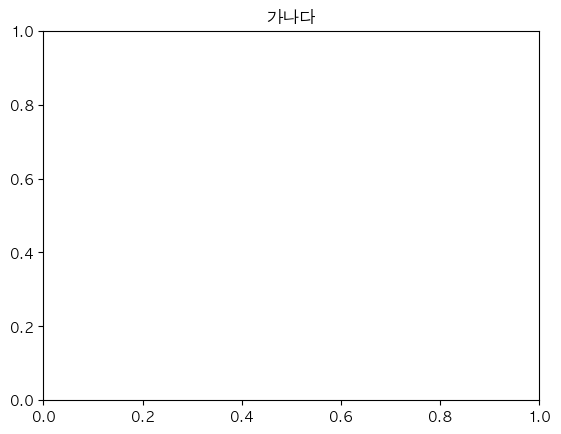

# 링크

In [68]:
# # 제목 
import pandas as pd
def get_title():
    data = []
    posts = driver.find_elements(By.CSS_SELECTOR, 'a.click_search_result_item')
    for post in posts:
        a = post.get_attribute('data-title')
        data.append(a)
    data = pd.DataFrame(data)
    data.columns= ['title']
    return data

data = get_title()
data

NameError: name 'driver' is not defined

In [ ]:
# 내용 

def get_article():
    article = []
    articles = driver.find_elements(By.CSS_SELECTOR,'p._588sy4192')
    for i in articles:
        article.append(i.text)
    article = pd.DataFrame(article)
    data['article']= article
    return data

get_article()
data


In [ ]:
# 동 
etc = []
def get_etc():
    dongs = driver.find_elements(By.CSS_SELECTOR,
                             'span._588sy418w._588sy4195._588sy41w._588sy41aw._588sy41b5._588sy42')
    for i in dongs:
        etc.append(i.text)      
    abcd = pd.DataFrame(etc)
    data['etc'] = abcd.iloc[0::3].reset_index(drop=True)
    return data

get_etc()

In [ ]:
from datetime import datetime 
def get_time():
    times =[]
    time = driver.find_elements(By.CSS_SELECTOR,
                                'time._588sy418w._588sy4195._588sy41w._588sy41aw._588sy41b5._588sy42')
    for i in time:
        times.append(i.text)
    times = pd.DataFrame(times)
    data['time'] = times
    data['current_time'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    return data

get_time()   

In [ ]:
# 좋아요 / 댓글
import pandas as pd
import re 

def get_like_comment():
    sample = []
    like = driver.find_elements(By.CSS_SELECTOR,
                                    'span._588sy4192._588sy41w._588sy41b2._588sy42')
    for i in like:
        sample.append(i.text)        
    sample = pd.DataFrame(sample)   
    likes = sample.iloc[0::2].reset_index(drop=True)
    comments = sample.iloc[1::2].reset_index(drop=True)
    data['like'] = likes
    data['comment'] = comments
    return data

get_like_comment()

In [72]:


def get_title(driver):
    posts = driver.find_elements(By.CSS_SELECTOR, 'a.click_search_result_item')
    titles = [post.get_attribute('data-title') for post in posts]
    return pd.DataFrame({"title": titles})

def get_article(driver):
    articles = driver.find_elements(By.CSS_SELECTOR, 'p._588sy4192')
    article_texts = [article.text for article in articles]
    return pd.DataFrame({"article": article_texts})

def get_etc(driver):
    dongs = driver.find_elements(By.CSS_SELECTOR,
                                 'span._588sy418w._588sy4195._588sy41w._588sy41aw._588sy41b5._588sy42')
    dong_texts = [dong.text for dong in dongs]
    etc_data = pd.DataFrame({"etc": dong_texts[0::3]}).reset_index(drop=True)  # 3개씩 중 첫 번째
    return etc_data

def get_time(driver):
    times = driver.find_elements(By.CSS_SELECTOR,
                                 'time._588sy418w._588sy4195._588sy41w._588sy41aw._588sy41b5._588sy42')
    time_texts = [time.text for time in times]
    current_time = [datetime.now().strftime('%Y-%m-%d %H:%M:%S')] * len(time_texts)
    return pd.DataFrame({"time": time_texts, "current_time": current_time})

def get_like_comment(driver):
    like_comments = driver.find_elements(By.CSS_SELECTOR, 'span._588sy4192._588sy41w._588sy41b2._588sy42')
    texts = [lc.text for lc in like_comments if '좋아요' in lc.text or '댓글' in lc.text]  # 필터링
    likes = texts[0::2]  # 좋아요
    comments = texts[1::2]  # 댓글
    return pd.DataFrame({"like": likes, "comment": comments})

def crawl(driver):
    title_data = get_title(driver)
    article_data = get_article(driver)
    etc_data = get_etc(driver)
    time_data = get_time(driver)
    like_comment_data = get_like_comment(driver)

    # DataFrame 병합
    data = pd.concat([title_data, article_data, etc_data, time_data, like_comment_data], axis=1)
    return data

def click_load_more(driver, max_clicks=2, wait_time=2):
    """
    더보기 버튼을 반복적으로 클릭하는 함수.
    """
    click_count = 0
    while click_count < max_clicks:
        try:
            more_button = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.CSS_SELECTOR, 'button._876es70._876es75._876es73._588sy462._588sy4r8'))
            )
            more_button.click()
            click_count += 1
            print(f"{click_count}번째 더보기 버튼 클릭 성공")
            time.sleep(wait_time)  # 데이터 로드 대기
        except Exception as e:
            print(f"더 이상 더보기 버튼이 없거나 오류 발생: {e}")
            break


def crawl_district(driver, url, district_name, max_clicks=3):
    """
    특정 구 데이터를 크롤링하는 함수.
    """
    driver.get(url)
    time.sleep(3)

    # 더보기 버튼 클릭
    click_load_more(driver, max_clicks=max_clicks)

    # 데이터 수집
    title_data = get_title(driver)
    article_data = get_article(driver)
    etc_data = get_etc(driver)
    time_data = get_time(driver)
    like_comment_data = get_like_comment(driver)

    # 데이터 병합
    district_data = pd.concat([title_data, article_data, etc_data, time_data, like_comment_data], axis=1)
    district_data["district"] = district_name  # 구 이름 추가

    return district_data

def crawl_all_districts(driver, district_urls, max_clicks=3):
    """
    모든 구 데이터를 크롤링하는 함수.
    """
    all_data = pd.DataFrame()

    for district_name, url in district_urls.items():
        print(f"현재 구: {district_name}")
        try:
            district_data = crawl_district(driver, url, district_name, max_clicks=max_clicks)
            all_data = pd.concat([all_data, district_data], ignore_index=True)
            print(f"{district_name}: {len(district_data)}개의 데이터 수집 완료")
        except Exception as e:
            print(f"{district_name}: 크롤링 중 오류 발생 - {e}")

    return all_data



# 서울시 전체 크롤링

In [195]:
# 구별 URL
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

district_urls = {
    "종로구": "https://www.daangn.com/kr/community/?in=종로구-2",
    "중구": 'https://www.daangn.com/kr/community/?in=중구-20',
    "용산구": 'https://www.daangn.com/kr/community/?in=용산구-36',
    "성동구": 'https://www.daangn.com/kr/community/?in=성동구-53',
    "광진구": 'https://www.daangn.com/kr/community/?in=광진구-71',
    "동대문구": 'https://www.daangn.com/kr/community/?in=동대문구-87',
    "중랑구": 'https://www.daangn.com/kr/community/?in=중랑구-102',
    "성북구": 'https://www.daangn.com/kr/community/?in=성북구-119',
    "강북구": 'https://www.daangn.com/kr/community/?in=강북구-140',
    "도봉구": 'https://www.daangn.com/kr/community/?in=도봉구-154',
    "노원구": 'https://www.daangn.com/kr/community/?in=노원구-169',
    "은평구": 'https://www.daangn.com/kr/community/?in=은평구-189',
    "서대문구": 'https://www.daangn.com/kr/community/?in=서대문구-206',
    "마포구": "https://www.daangn.com/kr/community/?in=마포구-221",
    "양천구": "https://www.daangn.com/kr/community/?in=양천구-238",
    "강서구": "https://www.daangn.com/kr/community/?in=강서구-257",
    "구로구": "https://www.daangn.com/kr/community/?in=구로구-278",
    "금천구": "https://www.daangn.com/kr/community/?in=금천구-294",
    "영등포구": "https://www.daangn.com/kr/community/?in=영등포구-305",
    "동작구": "https://www.daangn.com/kr/community/?in=동작구-324",
    "관악구": "https://www.daangn.com/kr/community/?in=관악구-340",
    "서초구": "https://www.daangn.com/kr/community/?in=서초구-362",
    "강남구": "https://www.daangn.com/kr/community/?in=강남구-381",
    "송파구": "https://www.daangn.com/kr/community/?in=송파구-404",
    "강동구": "https://www.daangn.com/kr/community/?in=강동구-432"
}

# 크롬 드라이버 실행
driver = webdriver.Chrome()

data = crawl_all_districts(driver, district_urls, max_clicks=3)


현재 구: 종로구
1번째 더보기 버튼 클릭 성공
더 이상 더보기 버튼이 없거나 오류 발생: Message: 
Stacktrace:
0   chromedriver                        0x000000010144bac4 cxxbridge1$str$ptr + 3651580
1   chromedriver                        0x0000000101444314 cxxbridge1$str$ptr + 3620940
2   chromedriver                        0x0000000100eac4b4 cxxbridge1$string$len + 89224
3   chromedriver                        0x0000000100ef0898 cxxbridge1$string$len + 368748
4   chromedriver                        0x0000000100f2a0fc cxxbridge1$string$len + 604368
5   chromedriver                        0x0000000100ee50b0 cxxbridge1$string$len + 321668
6   chromedriver                        0x0000000100ee5d00 cxxbridge1$string$len + 324820
7   chromedriver                        0x0000000101416e08 cxxbridge1$str$ptr + 3435328
8   chromedriver                        0x000000010141a120 cxxbridge1$str$ptr + 3448408
9   chromedriver                        0x00000001013fe17c cxxbridge1$str$ptr + 3333812
10  chromedriver                      

# 분석

In [207]:
import pandas as pd
data = pd.read_csv('crawling_11_27_16:41.csv')
data2 = pd.read_csv('crawling_12_28_01_02.csv')
data3 = pd.read_csv('crawling_11_28_09_20.csv')

data_concat = pd.concat([data, data2,data3], ignore_index=True)
data_concat

,title,article,etc,time,current_time,like,comment,district
0,첫눈,첫눈 함박눈이 펑 펑 내리고 있네요 경치 끝내 주네요,체부동\n·\n동네풍경\n·\n약 4시간 전,약 4시간 전,2024-11-27 16:41:30,좋아요 수\n0,댓글 수\n0,종로구
1,피크민 길 서치 눈 비,"피크민 길만 서치되는 곳 아실까요?? 눈, 비 피크민 모으고 싶은데ㅜㅠ 돌아다녀봐도...",숭인동\n·\n취미\n·\n약 4시간 전,약 4시간 전,2024-11-27 16:41:30,좋아요 수\n0,댓글 수\n0,종로구
2,눈오리 출몰,"네 제가 만들어두었어요 ㅋㅋㅋ 아침에 눈왔다고, 기뻐하며 눈오리 집게 챙겨서 출근하...",종로1가\n·\n취미\n·\n약 5시간 전,약 5시간 전,2024-11-27 16:41:30,좋아요 수\n0,댓글 수\n0,종로구
3,421번 버스 오전 9시 반쯤 에어팟 3세대 분실,421번 오전 9시20분에서 ~10시 사이에 신설동 - 충무로 - 용산쯤 버스 타신...,숭인제2동\n·\n분실/실종\n·\n약 6시간 전,약 6시간 전,2024-11-27 16:41:30,좋아요 수\n0,댓글 수\n0,종로구
4,광화문 근처에서 루이비통 카드 지갑 주우신분!,루이비통 카드지갑 주우신 분 계실까요? 발견하시면 댓글 좀 달아주세요 😭😭😭 오래쓰...,종로1.2.3.4가동\n·\n분실/실종\n·\n약 6시간 전,약 6시간 전,2024-11-27 16:41:30,좋아요 수\n0,댓글 수\n0,종로구
...,...,...,...,...,...,...,...,...
7495,같이 광나루 한강공원 장거리 러닝 하실분,25~30km 페이스는 600~630으로 시작해서 500정도까지 빌드업으로 뛰고 싶...,천호제3동\n·\n운동\n·\n2일 전,2일 전,2024-11-28 09:16:19,좋아요 수\n1,댓글 수\n2,강동구
7496,강동 농협사거리 신호등 생기고 너무 막히네요..,갑자기 신호등 생기면서 한번 우회전하려면 신호 2~3개는 지나야 겨우 지나가고 천호...,천호제3동\n·\n주거/부동산\n·\n2일 전,2일 전,2024-11-28 09:16:19,좋아요 수\n3,댓글 수\n7,강동구
7497,둔촌시장붕어빵,오랜만에ㅣ둔촌시장 갔는데 붕어빵이 생겼어요 맛있는지 궁금해서 사와봤어요,성내동\n·\n맛집\n·\n2일 전,2일 전,2024-11-28 09:16:19,좋아요 수\n2,댓글 수\n1,강동구
7498,과외는 어디서 구하시나요?,안녕하세요~! 현재 대치동에서 중등수학을 맡고 있는 학원 강사입니다. 그동안 너무 ...,둔촌동\n·\n교육\n·\n2일 전,2일 전,2024-11-28 09:16:19,좋아요 수\n0,댓글 수\n0,강동구


In [208]:
analysis = data_concat.copy()

In [206]:
analysis

,title,article,etc,time,current_time,like,comment,district
0,첫눈,첫눈 함박눈이 펑 펑 내리고 있네요 경치 끝내 주네요,체부동\n·\n동네풍경\n·\n약 4시간 전,약 4시간 전,2024-11-27 16:41:30,좋아요 수\n0,댓글 수\n0,종로구
1,피크민 길 서치 눈 비,"피크민 길만 서치되는 곳 아실까요?? 눈, 비 피크민 모으고 싶은데ㅜㅠ 돌아다녀봐도...",숭인동\n·\n취미\n·\n약 4시간 전,약 4시간 전,2024-11-27 16:41:30,좋아요 수\n0,댓글 수\n0,종로구
2,눈오리 출몰,"네 제가 만들어두었어요 ㅋㅋㅋ 아침에 눈왔다고, 기뻐하며 눈오리 집게 챙겨서 출근하...",종로1가\n·\n취미\n·\n약 5시간 전,약 5시간 전,2024-11-27 16:41:30,좋아요 수\n0,댓글 수\n0,종로구
3,421번 버스 오전 9시 반쯤 에어팟 3세대 분실,421번 오전 9시20분에서 ~10시 사이에 신설동 - 충무로 - 용산쯤 버스 타신...,숭인제2동\n·\n분실/실종\n·\n약 6시간 전,약 6시간 전,2024-11-27 16:41:30,좋아요 수\n0,댓글 수\n0,종로구
4,광화문 근처에서 루이비통 카드 지갑 주우신분!,루이비통 카드지갑 주우신 분 계실까요? 발견하시면 댓글 좀 달아주세요 😭😭😭 오래쓰...,종로1.2.3.4가동\n·\n분실/실종\n·\n약 6시간 전,약 6시간 전,2024-11-27 16:41:30,좋아요 수\n0,댓글 수\n0,종로구
...,...,...,...,...,...,...,...,...
3548,첫눈,첫눈와서 만들었는데 보실분들 보고 가세요... 다들 눈길조심,방이2동\n·\n동네사건사고\n·\n약 5시간 전,약 5시간 전,2024-11-28 09:15:58,좋아요 수\n0,댓글 수\n0,송파구
3549,핸드폰 갤럭시 플립 분실,송파 사거리 프라임 피시방 앞 신호등 쪽 푸터 갤럭시 플립 3 분실했습니다 보신 분...,송파1동\n·\n분실/실종\n·\n약 7시간 전,약 7시간 전,2024-11-28 09:15:58,좋아요 수\n0,댓글 수\n0,송파구
3550,5호택배사이즈 박스 하나만얻을수있을까요?,굿윌에 기부해야되는 옷들이 있는데 박스가 없어서요..ㅠㅠ 훼손되지만 않았다면 옷 1...,장지동\n·\n일반\n·\n약 7시간 전,약 7시간 전,2024-11-28 09:15:58,좋아요 수\n0,댓글 수\n1,송파구
3551,서울 상경 3개월차,동네친구 구해여! 술 피시방 당구 노래방 다 좋아해요 일끝나고 간술좋아하고 살면서 ...,방이2동\n·\n동네친구\n·\n약 8시간 전,약 8시간 전,2024-11-28 09:15:58,좋아요 수\n0,댓글 수\n0,송파구


In [215]:
# 중복제거 
duplicates = analysis.duplicated(subset=['title','article', 'district'])

idx = pd.DataFrame(duplicates).loc[duplicates==True].index

analysis = analysis.drop_duplicates(subset=['title','article'])

analysis.reset_index(drop=True, inplace=True)

In [216]:
analysis

,title,article,etc,time,current_time,like,comment,district
0,첫눈,첫눈 함박눈이 펑 펑 내리고 있네요 경치 끝내 주네요,체부동\n·\n동네풍경\n·\n약 4시간 전,약 4시간 전,2024-11-27 16:41:30,좋아요 수\n0,댓글 수\n0,종로구
1,피크민 길 서치 눈 비,"피크민 길만 서치되는 곳 아실까요?? 눈, 비 피크민 모으고 싶은데ㅜㅠ 돌아다녀봐도...",숭인동\n·\n취미\n·\n약 4시간 전,약 4시간 전,2024-11-27 16:41:30,좋아요 수\n0,댓글 수\n0,종로구
2,눈오리 출몰,"네 제가 만들어두었어요 ㅋㅋㅋ 아침에 눈왔다고, 기뻐하며 눈오리 집게 챙겨서 출근하...",종로1가\n·\n취미\n·\n약 5시간 전,약 5시간 전,2024-11-27 16:41:30,좋아요 수\n0,댓글 수\n0,종로구
3,421번 버스 오전 9시 반쯤 에어팟 3세대 분실,421번 오전 9시20분에서 ~10시 사이에 신설동 - 충무로 - 용산쯤 버스 타신...,숭인제2동\n·\n분실/실종\n·\n약 6시간 전,약 6시간 전,2024-11-27 16:41:30,좋아요 수\n0,댓글 수\n0,종로구
4,광화문 근처에서 루이비통 카드 지갑 주우신분!,루이비통 카드지갑 주우신 분 계실까요? 발견하시면 댓글 좀 달아주세요 😭😭😭 오래쓰...,종로1.2.3.4가동\n·\n분실/실종\n·\n약 6시간 전,약 6시간 전,2024-11-27 16:41:30,좋아요 수\n0,댓글 수\n0,종로구
...,...,...,...,...,...,...,...,...
3548,첫눈,첫눈와서 만들었는데 보실분들 보고 가세요... 다들 눈길조심,방이2동\n·\n동네사건사고\n·\n약 5시간 전,약 5시간 전,2024-11-28 09:15:58,좋아요 수\n0,댓글 수\n0,송파구
3549,핸드폰 갤럭시 플립 분실,송파 사거리 프라임 피시방 앞 신호등 쪽 푸터 갤럭시 플립 3 분실했습니다 보신 분...,송파1동\n·\n분실/실종\n·\n약 7시간 전,약 7시간 전,2024-11-28 09:15:58,좋아요 수\n0,댓글 수\n0,송파구
3550,5호택배사이즈 박스 하나만얻을수있을까요?,굿윌에 기부해야되는 옷들이 있는데 박스가 없어서요..ㅠㅠ 훼손되지만 않았다면 옷 1...,장지동\n·\n일반\n·\n약 7시간 전,약 7시간 전,2024-11-28 09:15:58,좋아요 수\n0,댓글 수\n1,송파구
3551,서울 상경 3개월차,동네친구 구해여! 술 피시방 당구 노래방 다 좋아해요 일끝나고 간술좋아하고 살면서 ...,방이2동\n·\n동네친구\n·\n약 8시간 전,약 8시간 전,2024-11-28 09:15:58,좋아요 수\n0,댓글 수\n0,송파구


In [205]:
analysis

,title,article,etc,time,current_time,like,comment,district
0,첫눈,첫눈 함박눈이 펑 펑 내리고 있네요 경치 끝내 주네요,체부동\n·\n동네풍경\n·\n약 4시간 전,약 4시간 전,2024-11-27 16:41:30,좋아요 수\n0,댓글 수\n0,종로구
1,피크민 길 서치 눈 비,"피크민 길만 서치되는 곳 아실까요?? 눈, 비 피크민 모으고 싶은데ㅜㅠ 돌아다녀봐도...",숭인동\n·\n취미\n·\n약 4시간 전,약 4시간 전,2024-11-27 16:41:30,좋아요 수\n0,댓글 수\n0,종로구
2,눈오리 출몰,"네 제가 만들어두었어요 ㅋㅋㅋ 아침에 눈왔다고, 기뻐하며 눈오리 집게 챙겨서 출근하...",종로1가\n·\n취미\n·\n약 5시간 전,약 5시간 전,2024-11-27 16:41:30,좋아요 수\n0,댓글 수\n0,종로구
3,421번 버스 오전 9시 반쯤 에어팟 3세대 분실,421번 오전 9시20분에서 ~10시 사이에 신설동 - 충무로 - 용산쯤 버스 타신...,숭인제2동\n·\n분실/실종\n·\n약 6시간 전,약 6시간 전,2024-11-27 16:41:30,좋아요 수\n0,댓글 수\n0,종로구
4,광화문 근처에서 루이비통 카드 지갑 주우신분!,루이비통 카드지갑 주우신 분 계실까요? 발견하시면 댓글 좀 달아주세요 😭😭😭 오래쓰...,종로1.2.3.4가동\n·\n분실/실종\n·\n약 6시간 전,약 6시간 전,2024-11-27 16:41:30,좋아요 수\n0,댓글 수\n0,종로구
...,...,...,...,...,...,...,...,...
3548,첫눈,첫눈와서 만들었는데 보실분들 보고 가세요... 다들 눈길조심,방이2동\n·\n동네사건사고\n·\n약 5시간 전,약 5시간 전,2024-11-28 09:15:58,좋아요 수\n0,댓글 수\n0,송파구
3549,핸드폰 갤럭시 플립 분실,송파 사거리 프라임 피시방 앞 신호등 쪽 푸터 갤럭시 플립 3 분실했습니다 보신 분...,송파1동\n·\n분실/실종\n·\n약 7시간 전,약 7시간 전,2024-11-28 09:15:58,좋아요 수\n0,댓글 수\n0,송파구
3550,5호택배사이즈 박스 하나만얻을수있을까요?,굿윌에 기부해야되는 옷들이 있는데 박스가 없어서요..ㅠㅠ 훼손되지만 않았다면 옷 1...,장지동\n·\n일반\n·\n약 7시간 전,약 7시간 전,2024-11-28 09:15:58,좋아요 수\n0,댓글 수\n1,송파구
3551,서울 상경 3개월차,동네친구 구해여! 술 피시방 당구 노래방 다 좋아해요 일끝나고 간술좋아하고 살면서 ...,방이2동\n·\n동네친구\n·\n약 8시간 전,약 8시간 전,2024-11-28 09:15:58,좋아요 수\n0,댓글 수\n0,송파구


In [217]:
# etc 동이랑 카테고리 
import pandas as pd
from datetime import datetime, timedelta
import re
def etc_split(df):
      for idx, i in enumerate(df['etc']):
         index_ =  {idx : i.split('\n')[0]}
         category = {idx : i.split('\n')[2]}
         df.loc[idx, 'dong'] = index_.get(idx)
         df.loc[idx,'category'] = category.get(idx)
      return df

def like_comment(df):
    for idx, i in enumerate(df['like']):
        like_check = re.findall('\d+',i)
        df.loc[idx, 'like'] = like_check[0]
    for idx, i in enumerate(df['comment']):
        comment_check = re.findall('\d+',i)
        df.loc[idx, 'comment'] = comment_check[0]
    return df

def convert_time(row):
    # 문자열로 된 current_time을 datetime 객체로 변환
    current_time = datetime.strptime(row['current_time'], '%Y-%m-%d %H:%M:%S')
    time_text = row['time']

    # 정규표현식으로 "숫자"와 "단위" 추출
    match = re.search(r'(\d+)(분|시간|일)', time_text)
    if match:
        value, unit = int(match.group(1)), match.group(2)
        if unit == '분':  # 분 전
            delta = timedelta(minutes=value)
        elif unit == '시간':  # 시간 전
            delta = timedelta(hours=value)
        elif unit == '일':  # 일 전
            delta = timedelta(days=value)
        else:
            delta = timedelta(0)  # 기타 처리 없음
        update_time = current_time - delta
        return update_time.strftime('%Y-%m-%d %H:%M:%S')  # 포맷팅 후 반환
    else:
        return None  # 상대적 시간 아닌 경우

def preprocessing(df):
    etc_split(df)
    like_comment(df)   

In [218]:

preprocessing(analysis)
analysis['update_time'] = analysis.apply(convert_time, axis=1)

In [219]:
analysis.drop('etc', axis=1, inplace=True)  
analysis.drop('time', axis=1, inplace=True)

In [220]:
def clean_text_with_numbers(text):
    # HTML 태그와 특수문자만 제거, 숫자는 유지
    text = re.sub(r'<[^>]+>', '', text)  # HTML 태그 제거
    text = re.sub(r'[^\w\s]', '', text)  # 특수문자 제거
    return text.strip()

# title과 article 전처리
analysis['cleaned_title'] = analysis['title'].apply(clean_text_with_numbers)
analysis['cleaned_article'] = analysis['article'].apply(clean_text_with_numbers)


analysis

,title,article,current_time,like,comment,district,dong,category,update_time,cleaned_title,cleaned_article
0,첫눈,첫눈 함박눈이 펑 펑 내리고 있네요 경치 끝내 주네요,2024-11-27 16:41:30,0,0,종로구,체부동,동네풍경,2024-11-27 12:41:30,첫눈,첫눈 함박눈이 펑 펑 내리고 있네요 경치 끝내 주네요
1,피크민 길 서치 눈 비,"피크민 길만 서치되는 곳 아실까요?? 눈, 비 피크민 모으고 싶은데ㅜㅠ 돌아다녀봐도...",2024-11-27 16:41:30,0,0,종로구,숭인동,취미,2024-11-27 12:41:30,피크민 길 서치 눈 비,피크민 길만 서치되는 곳 아실까요 눈 비 피크민 모으고 싶은데ㅜㅠ 돌아다녀봐도 못찾겠어용
2,눈오리 출몰,"네 제가 만들어두었어요 ㅋㅋㅋ 아침에 눈왔다고, 기뻐하며 눈오리 집게 챙겨서 출근하...",2024-11-27 16:41:30,0,0,종로구,종로1가,취미,2024-11-27 11:41:30,눈오리 출몰,네 제가 만들어두었어요 ㅋㅋㅋ 아침에 눈왔다고 기뻐하며 눈오리 집게 챙겨서 출근하는...
3,421번 버스 오전 9시 반쯤 에어팟 3세대 분실,421번 오전 9시20분에서 ~10시 사이에 신설동 - 충무로 - 용산쯤 버스 타신...,2024-11-27 16:41:30,0,0,종로구,숭인제2동,분실/실종,2024-11-27 10:41:30,421번 버스 오전 9시 반쯤 에어팟 3세대 분실,421번 오전 9시20분에서 10시 사이에 신설동 충무로 용산쯤 버스 타신분 중...
4,광화문 근처에서 루이비통 카드 지갑 주우신분!,루이비통 카드지갑 주우신 분 계실까요? 발견하시면 댓글 좀 달아주세요 😭😭😭 오래쓰...,2024-11-27 16:41:30,0,0,종로구,종로1.2.3.4가동,분실/실종,2024-11-27 10:41:30,광화문 근처에서 루이비통 카드 지갑 주우신분,루이비통 카드지갑 주우신 분 계실까요 발견하시면 댓글 좀 달아주세요 오래쓰기도 하...
...,...,...,...,...,...,...,...,...,...,...,...
3548,첫눈,첫눈와서 만들었는데 보실분들 보고 가세요... 다들 눈길조심,2024-11-28 09:15:58,0,0,송파구,방이2동,동네사건사고,2024-11-28 04:15:58,첫눈,첫눈와서 만들었는데 보실분들 보고 가세요 다들 눈길조심
3549,핸드폰 갤럭시 플립 분실,송파 사거리 프라임 피시방 앞 신호등 쪽 푸터 갤럭시 플립 3 분실했습니다 보신 분...,2024-11-28 09:15:58,0,0,송파구,송파1동,분실/실종,2024-11-28 02:15:58,핸드폰 갤럭시 플립 분실,송파 사거리 프라임 피시방 앞 신호등 쪽 푸터 갤럭시 플립 3 분실했습니다 보신 분...
3550,5호택배사이즈 박스 하나만얻을수있을까요?,굿윌에 기부해야되는 옷들이 있는데 박스가 없어서요..ㅠㅠ 훼손되지만 않았다면 옷 1...,2024-11-28 09:15:58,0,1,송파구,장지동,일반,2024-11-28 02:15:58,5호택배사이즈 박스 하나만얻을수있을까요,굿윌에 기부해야되는 옷들이 있는데 박스가 없어서요ㅠㅠ 훼손되지만 않았다면 옷 12벌...
3551,서울 상경 3개월차,동네친구 구해여! 술 피시방 당구 노래방 다 좋아해요 일끝나고 간술좋아하고 살면서 ...,2024-11-28 09:15:58,0,0,송파구,방이2동,동네친구,2024-11-28 01:15:58,서울 상경 3개월차,동네친구 구해여 술 피시방 당구 노래방 다 좋아해요 일끝나고 간술좋아하고 살면서 성...


In [221]:
word = analysis.copy()

from konlpy.tag import Okt

okt = Okt()

# 사용할 품사 리스트
allowed_pos = ['Noun', 'Verb', 'Adjective', 'Adverb', 'Determiner', 'Root']

# 텍스트를 형태소 분석 후 특정 품사만 추출
def extract_allowed_pos(text, allowed_pos):
    tokens = okt.pos(text)  # 형태소 분석
    return ','.join([word for word, pos in tokens if pos in allowed_pos])  # 필터링

# 제목과 본문에서 특정 품사만 추출
word['extracted_title'] = word['cleaned_title'].apply(lambda x: extract_allowed_pos(x, allowed_pos))
word['extracted_article'] = word['cleaned_article'].apply(lambda x: extract_allowed_pos(x, allowed_pos))

# 결과 확인

In [222]:
word

,title,article,current_time,like,comment,district,dong,category,update_time,cleaned_title,cleaned_article,extracted_title,extracted_article
0,첫눈,첫눈 함박눈이 펑 펑 내리고 있네요 경치 끝내 주네요,2024-11-27 16:41:30,0,0,종로구,체부동,동네풍경,2024-11-27 12:41:30,첫눈,첫눈 함박눈이 펑 펑 내리고 있네요 경치 끝내 주네요,눈,"눈,함박눈,펑,펑,내리고,있네요,경치,끝내,주네"
1,피크민 길 서치 눈 비,"피크민 길만 서치되는 곳 아실까요?? 눈, 비 피크민 모으고 싶은데ㅜㅠ 돌아다녀봐도...",2024-11-27 16:41:30,0,0,종로구,숭인동,취미,2024-11-27 12:41:30,피크민 길 서치 눈 비,피크민 길만 서치되는 곳 아실까요 눈 비 피크민 모으고 싶은데ㅜㅠ 돌아다녀봐도 못찾겠어용,"피크민,길,서치,눈,비","피크민,길,서치,되는,곳,아실까,요,눈,비,피크민,모으고,싶은데,돌아다녀,봐도,찾겠어용"
2,눈오리 출몰,"네 제가 만들어두었어요 ㅋㅋㅋ 아침에 눈왔다고, 기뻐하며 눈오리 집게 챙겨서 출근하...",2024-11-27 16:41:30,0,0,종로구,종로1가,취미,2024-11-27 11:41:30,눈오리 출몰,네 제가 만들어두었어요 ㅋㅋㅋ 아침에 눈왔다고 기뻐하며 눈오리 집게 챙겨서 출근하는...,"눈,오리,출몰","네,제,만들어,두었어요,아침,눈,왔다고,기뻐하며,눈,오리,집게,챙겨서,출근,하는,직..."
3,421번 버스 오전 9시 반쯤 에어팟 3세대 분실,421번 오전 9시20분에서 ~10시 사이에 신설동 - 충무로 - 용산쯤 버스 타신...,2024-11-27 16:41:30,0,0,종로구,숭인제2동,분실/실종,2024-11-27 10:41:30,421번 버스 오전 9시 반쯤 에어팟 3세대 분실,421번 오전 9시20분에서 10시 사이에 신설동 충무로 용산쯤 버스 타신분 중...,"번,버스,오전,쯤,에어팟,세대,분실","번,오전,사이,신설,충무로,용산,버스,신분,중,에어팟,세대,본체,오른쪽,유닛,들어있..."
4,광화문 근처에서 루이비통 카드 지갑 주우신분!,루이비통 카드지갑 주우신 분 계실까요? 발견하시면 댓글 좀 달아주세요 😭😭😭 오래쓰...,2024-11-27 16:41:30,0,0,종로구,종로1.2.3.4가동,분실/실종,2024-11-27 10:41:30,광화문 근처에서 루이비통 카드 지갑 주우신분,루이비통 카드지갑 주우신 분 계실까요 발견하시면 댓글 좀 달아주세요 오래쓰기도 하...,"광화문,근처,루이비통,카드,지갑,주우,신분","루이비통,카드,지갑,주우신,분,계실까,요,발견,하시면,댓글,좀,달아주세요,오래,쓰기..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,첫눈,첫눈와서 만들었는데 보실분들 보고 가세요... 다들 눈길조심,2024-11-28 09:15:58,0,0,송파구,방이2동,동네사건사고,2024-11-28 04:15:58,첫눈,첫눈와서 만들었는데 보실분들 보고 가세요 다들 눈길조심,눈,"눈,서,만들었는데,보실,보고,가세,다,들,눈길,조심"
3549,핸드폰 갤럭시 플립 분실,송파 사거리 프라임 피시방 앞 신호등 쪽 푸터 갤럭시 플립 3 분실했습니다 보신 분...,2024-11-28 09:15:58,0,0,송파구,송파1동,분실/실종,2024-11-28 02:15:58,핸드폰 갤럭시 플립 분실,송파 사거리 프라임 피시방 앞 신호등 쪽 푸터 갤럭시 플립 3 분실했습니다 보신 분...,"핸드폰,갤럭시,플립,분실","송파,사거리,프라임,피시방,앞,신호등,쪽,푸,터,갤럭시,플립,분실,했습니다,보신,분..."
3550,5호택배사이즈 박스 하나만얻을수있을까요?,굿윌에 기부해야되는 옷들이 있는데 박스가 없어서요..ㅠㅠ 훼손되지만 않았다면 옷 1...,2024-11-28 09:15:58,0,1,송파구,장지동,일반,2024-11-28 02:15:58,5호택배사이즈 박스 하나만얻을수있을까요,굿윌에 기부해야되는 옷들이 있는데 박스가 없어서요ㅠㅠ 훼손되지만 않았다면 옷 12벌...,"호,택배,사이즈,박스,하나,얻을수있을까요","굿윌,기부,해야,되는,옷,있는데,박스,없어서요,훼손,되지만,않았다면,옷,벌,정도,들..."
3551,서울 상경 3개월차,동네친구 구해여! 술 피시방 당구 노래방 다 좋아해요 일끝나고 간술좋아하고 살면서 ...,2024-11-28 09:15:58,0,0,송파구,방이2동,동네친구,2024-11-28 01:15:58,서울 상경 3개월차,동네친구 구해여 술 피시방 당구 노래방 다 좋아해요 일끝나고 간술좋아하고 살면서 성...,"서울,상경,개월차","동네,친구,구해,술,피시방,당구,노래방,다,좋아해요,일,끝나고,간술,좋아하고,살면서..."


In [223]:
import re

# 불용어 로드
with open('stopwords.ini', 'r', encoding='utf-8') as infile:
    stopwords = [line.strip() for line in infile if line.strip()]  # 공백 제거 및 빈 줄 제거

# 불용어 제거 함수 정의
def remove_stopwords(text):
    # 쉼표로 분리된 문자열을 리스트로 변환
    words = text.split(',')
    # 불용어 제거
    filtered_words = [word.strip() for word in words if word.strip() not in stopwords]
    return ','.join(filtered_words)  # 다시 쉼표로 연결된 문자열로 반환

# extracted_title과 extracted_article에 불용어 처리 적용
word['filtered_extracted_title'] = word['extracted_title'].apply(remove_stopwords)
word['filtered_extracted_article'] = word['extracted_article'].apply(remove_stopwords)

word

,title,article,current_time,like,comment,district,dong,category,update_time,cleaned_title,cleaned_article,extracted_title,extracted_article,filtered_extracted_title,filtered_extracted_article
0,첫눈,첫눈 함박눈이 펑 펑 내리고 있네요 경치 끝내 주네요,2024-11-27 16:41:30,0,0,종로구,체부동,동네풍경,2024-11-27 12:41:30,첫눈,첫눈 함박눈이 펑 펑 내리고 있네요 경치 끝내 주네요,눈,"눈,함박눈,펑,펑,내리고,있네요,경치,끝내,주네",눈,"눈,함박눈,펑,펑,내리고,있네요,경치,끝내,주네"
1,피크민 길 서치 눈 비,"피크민 길만 서치되는 곳 아실까요?? 눈, 비 피크민 모으고 싶은데ㅜㅠ 돌아다녀봐도...",2024-11-27 16:41:30,0,0,종로구,숭인동,취미,2024-11-27 12:41:30,피크민 길 서치 눈 비,피크민 길만 서치되는 곳 아실까요 눈 비 피크민 모으고 싶은데ㅜㅠ 돌아다녀봐도 못찾겠어용,"피크민,길,서치,눈,비","피크민,길,서치,되는,곳,아실까,요,눈,비,피크민,모으고,싶은데,돌아다녀,봐도,찾겠어용","피크민,길,서치,눈,비","피크민,길,서치,되는,아실까,눈,비,피크민,모으고,돌아다녀,봐도,찾겠어용"
2,눈오리 출몰,"네 제가 만들어두었어요 ㅋㅋㅋ 아침에 눈왔다고, 기뻐하며 눈오리 집게 챙겨서 출근하...",2024-11-27 16:41:30,0,0,종로구,종로1가,취미,2024-11-27 11:41:30,눈오리 출몰,네 제가 만들어두었어요 ㅋㅋㅋ 아침에 눈왔다고 기뻐하며 눈오리 집게 챙겨서 출근하는...,"눈,오리,출몰","네,제,만들어,두었어요,아침,눈,왔다고,기뻐하며,눈,오리,집게,챙겨서,출근,하는,직...","눈,오리,출몰","만들어,두었어요,아침,눈,왔다고,기뻐하며,눈,오리,집게,챙겨서,출근,직장인,나야,발..."
3,421번 버스 오전 9시 반쯤 에어팟 3세대 분실,421번 오전 9시20분에서 ~10시 사이에 신설동 - 충무로 - 용산쯤 버스 타신...,2024-11-27 16:41:30,0,0,종로구,숭인제2동,분실/실종,2024-11-27 10:41:30,421번 버스 오전 9시 반쯤 에어팟 3세대 분실,421번 오전 9시20분에서 10시 사이에 신설동 충무로 용산쯤 버스 타신분 중...,"번,버스,오전,쯤,에어팟,세대,분실","번,오전,사이,신설,충무로,용산,버스,신분,중,에어팟,세대,본체,오른쪽,유닛,들어있...","버스,오전,쯤,에어팟,세대,분실","오전,사이,신설,충무로,용산,버스,에어팟,세대,본체,오른쪽,유닛,들어있는,에어팟,습..."
4,광화문 근처에서 루이비통 카드 지갑 주우신분!,루이비통 카드지갑 주우신 분 계실까요? 발견하시면 댓글 좀 달아주세요 😭😭😭 오래쓰...,2024-11-27 16:41:30,0,0,종로구,종로1.2.3.4가동,분실/실종,2024-11-27 10:41:30,광화문 근처에서 루이비통 카드 지갑 주우신분,루이비통 카드지갑 주우신 분 계실까요 발견하시면 댓글 좀 달아주세요 오래쓰기도 하...,"광화문,근처,루이비통,카드,지갑,주우,신분","루이비통,카드,지갑,주우신,분,계실까,요,발견,하시면,댓글,좀,달아주세요,오래,쓰기...","광화문,루이비통,카드,지갑,주우","루이비통,카드,지갑,주우신,발견,하시면,댓글,달아주세요,오래,쓰기,카드,많아서,헐렁..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,첫눈,첫눈와서 만들었는데 보실분들 보고 가세요... 다들 눈길조심,2024-11-28 09:15:58,0,0,송파구,방이2동,동네사건사고,2024-11-28 04:15:58,첫눈,첫눈와서 만들었는데 보실분들 보고 가세요 다들 눈길조심,눈,"눈,서,만들었는데,보실,보고,가세,다,들,눈길,조심",눈,"눈,서,만들었는데,보실,보고,가세,눈길,조심"
3549,핸드폰 갤럭시 플립 분실,송파 사거리 프라임 피시방 앞 신호등 쪽 푸터 갤럭시 플립 3 분실했습니다 보신 분...,2024-11-28 09:15:58,0,0,송파구,송파1동,분실/실종,2024-11-28 02:15:58,핸드폰 갤럭시 플립 분실,송파 사거리 프라임 피시방 앞 신호등 쪽 푸터 갤럭시 플립 3 분실했습니다 보신 분...,"핸드폰,갤럭시,플립,분실","송파,사거리,프라임,피시방,앞,신호등,쪽,푸,터,갤럭시,플립,분실,했습니다,보신,분...","핸드폰,갤럭시,플립,분실","송파,프라임,피시방,신호등,푸,터,갤럭시,플립,분실,했습니다,제발"
3550,5호택배사이즈 박스 하나만얻을수있을까요?,굿윌에 기부해야되는 옷들이 있는데 박스가 없어서요..ㅠㅠ 훼손되지만 않았다면 옷 1...,2024-11-28 09:15:58,0,1,송파구,장지동,일반,2024-11-28 02:15:58,5호택배사이즈 박스 하나만얻을수있을까요,굿윌에 기부해야되는 옷들이 있는데 박스가 없어서요ㅠㅠ 훼손되지만 않았다면 옷 12벌...,"호,택배,사이즈,박스,하나,얻을수있을까요","굿윌,기부,해야,되는,옷,있는데,박스,없어서요,훼손,되지만,않았다면,옷,벌,정도,들...","호,택배,사이즈,박스,얻을수있을까요","굿윌,기부,되는,옷,있는데,박스,없어서요,훼손,되지만,않았다면,옷,벌,들어가는,박스..."
3551,서울 상경 3개월차,동네친구 구해여! 술 피시방 당구 노래방 다 좋아해요 일끝나고 간술좋아하고 살면서 ...,2024-11-28 09:15:58,0,0,송파구,방이2동,동네친구,2024-11-28 01:15:58,서울 상경 3개월차,동네친구 구해여 술 피시방 당구 노래방 다 좋아해요 일끝나고 간술좋아하고 살면서 성...,"서울,상경,개월차","동네,친구,구해,술,피시방,당구,노래방,다,좋아해요,일,끝나고,간술,좋아하고,살면서...","서울,상경,개월차","동네,친구,술,피시방,당구,노래방,좋아해요,끝나고,간술,좋아하고,살면서,성격,모나,..."


In [ ]:
# from collections import Counter
# import pandas as pd

# # 제목과 본문을 결합하여 단어 분석
# word['combined_text'] = word['filtered_extracted_title'] + ',' + word['filtered_extracted_article']

# # 결합된 텍스트에서 단어 빈도 계산
# def calculate_word_frequency(text):
#     words = text.split(',')
#     return Counter(words)

# # 주제어를 저장할 딕셔너리
# keyword_by_district = {}

# # 지역별로 단어 빈도 계산
# for district, texts in word.groupby('district')['combined_text']:
#     combined_text = ','.join(texts)  # 지역별 텍스트 결합
#     word_counts = calculate_word_frequency(combined_text)  # 단어 빈도 계산
#     keyword_by_district[district] = word_counts.most_common(30)  # 상위 10개 단어 저장

# # 결과 출력
# for district, keywords in keyword_by_district.items():
#     print(f"지역: {district}")
#     for word, freq in keywords:
#         print(f"  - {word}: {freq}회")
#     print()

지역: 강남구
  - 눈: 25회
  - 친구: 15회
  - 사진: 13회
  - 강남역: 12회
  - 붕어빵: 12회
  - 지갑: 12회
  - 물건: 11회
  - 집: 11회
  - 분실: 10회
  - 과외: 10회
  - 댓글: 9회
  - 진짜: 9회
  - 출구: 9회
  - 생각: 9회
  - 업체: 8회
  - 구매: 8회
  - 처음: 8회
  - 찾습니다: 8회
  - 얼굴: 8회
  - 당근: 8회
  - 판매: 8회
  - 강아지: 8회
  - 시작: 8회
  - 삼성: 8회
  - 주우: 8회
  - 주변: 7회
  - 가격: 7회
  - 선릉역: 7회
  - 키링: 7회
  - 카드: 7회

지역: 강동구
  - 눈: 20회
  - 집: 13회
  - 맛집: 12회
  - 개: 12회
  - 길동: 11회
  - 고구마: 11회
  - 차단기: 11회
  - 강동구: 10회
  - 카페: 9회
  - 숯: 9회
  - 노천: 9회
  - 탕: 9회
  - 배달: 9회
  - 분실: 8회
  - 사진: 7회
  - 저녁: 7회
  - 가마: 7회
  - 목초액: 7회
  - 성내동: 7회
  - 방문: 7회
  - 붕어빵: 7회
  - 친구: 7회
  - 싶어요: 7회
  - 미사: 7회
  - 강동: 7회
  - 고양이: 7회
  - 병원: 7회
  - 아파트: 7회
  - 자주: 6회
  - 해주실: 6회

지역: 강북구
  - 수유: 20회
  - 친구: 20회
  - 눈: 17회
  - 수유역: 16회
  - 집: 13회
  - 벽지: 12회
  - 동네: 11회
  - 미아사거리: 11회
  - 이사: 11회
  - 가게: 10회
  - 사과: 10회
  - 이불: 10회
  - 지갑: 9회
  - 고양이: 8회
  - 시장: 7회
  - 가격: 7회
  - 저녁: 7회
  - 미아동: 7회
  - 강북구: 7회
  - 운동: 7회
  - 헬스장: 7회
  - 호떡: 7회
  - 입주: 7회
  - 청소: 7회
  - 강

## 단순 워드클라우드 

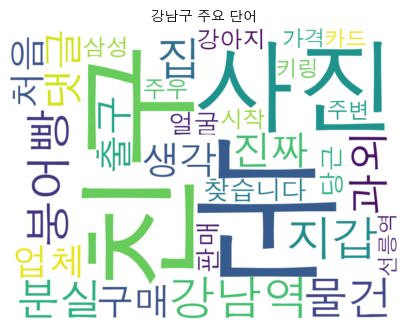

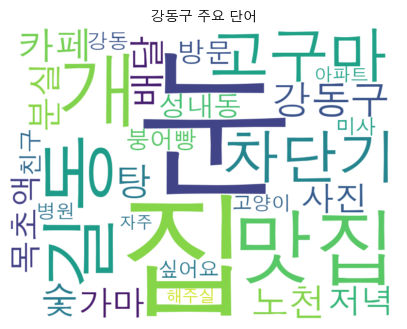

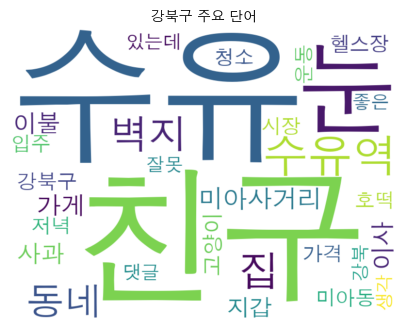

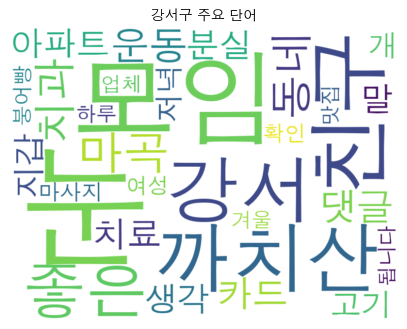

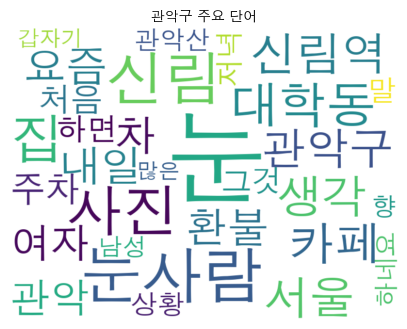

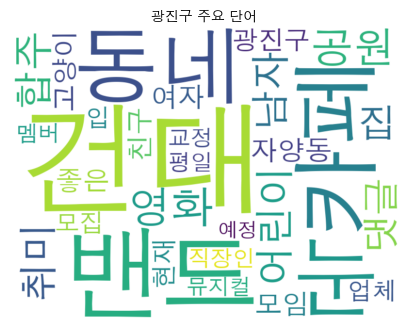

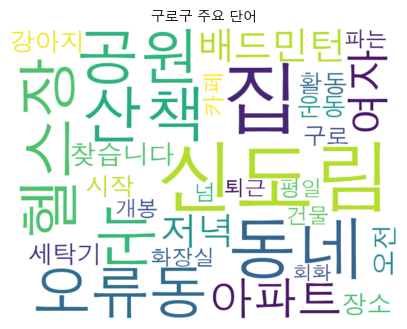

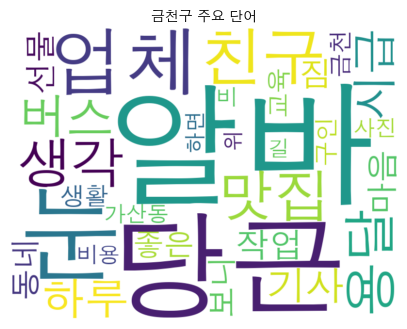

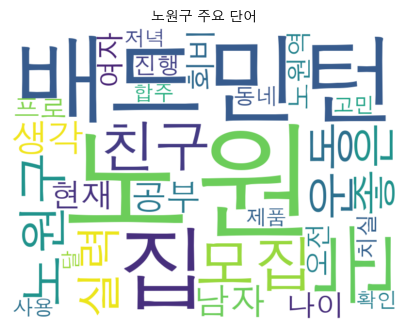

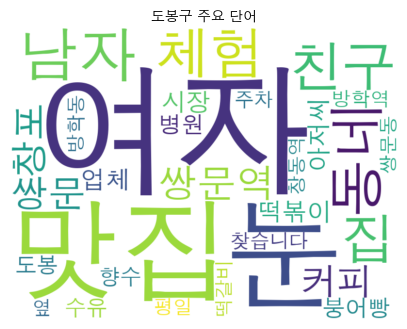

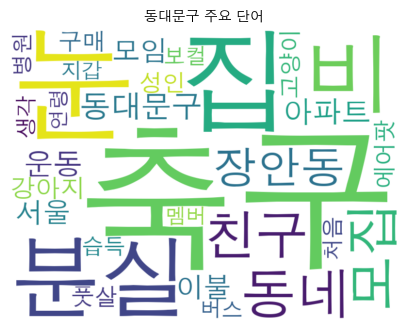

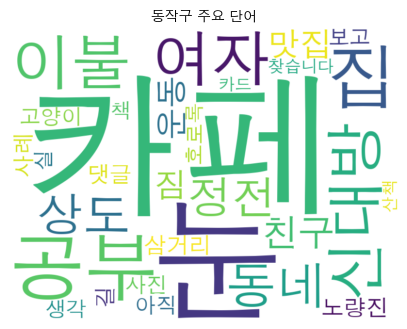

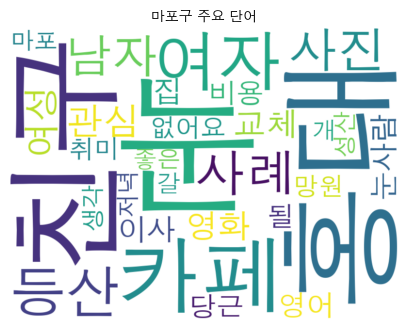

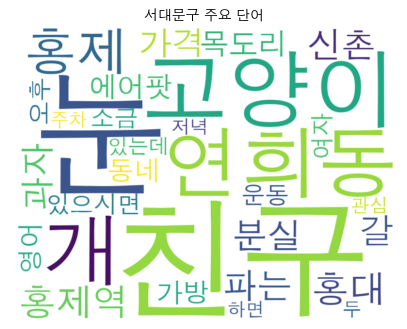

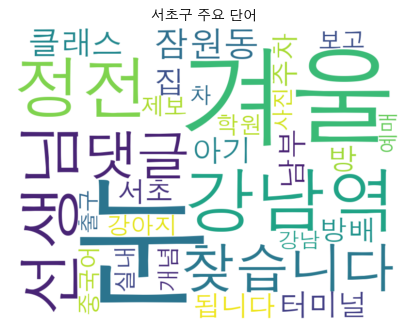

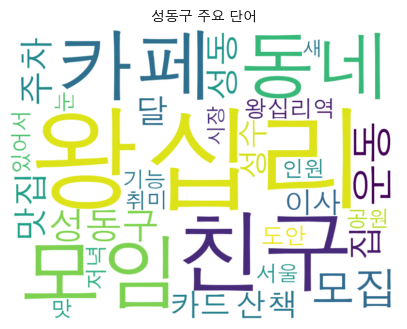

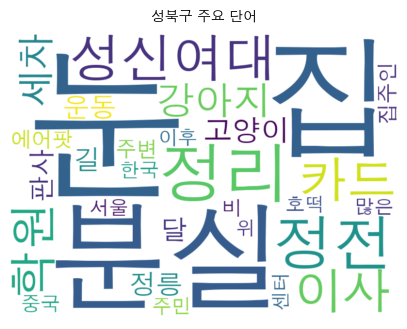

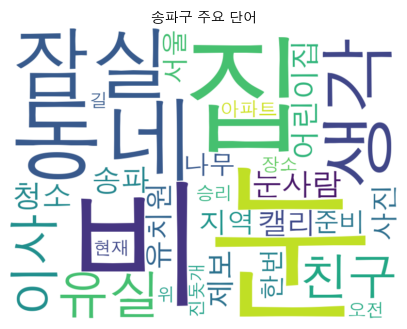

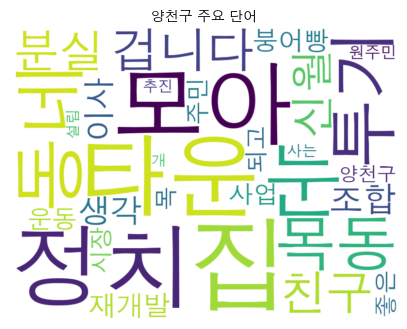

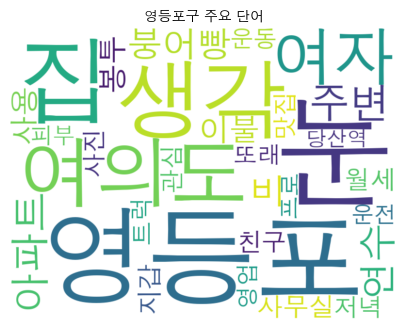

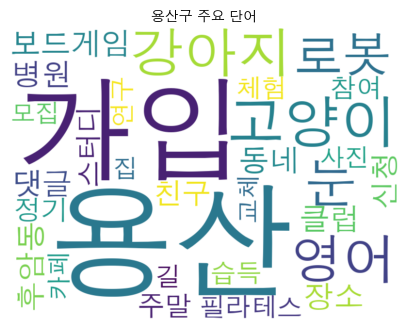

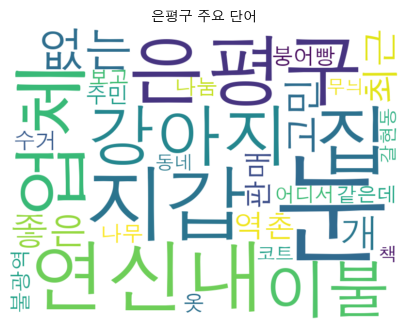

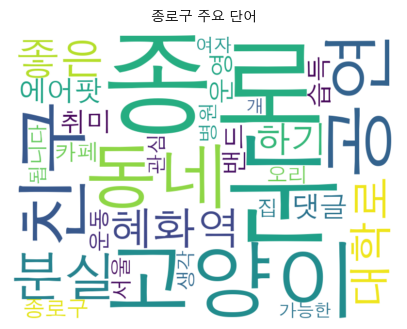

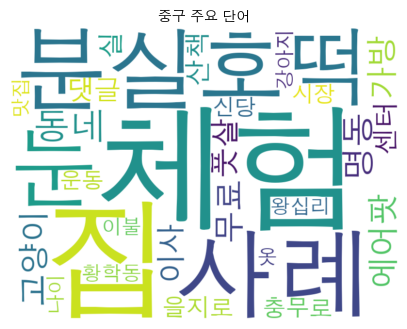

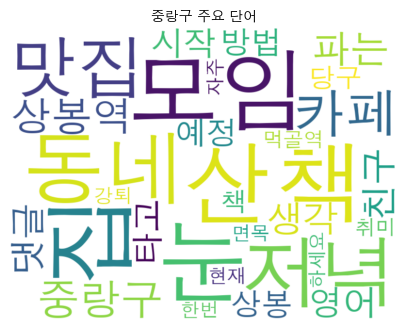

In [161]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 워드 클라우드 생성 함수
def generate_wordcloud(word_counts, title):
    wordcloud = WordCloud(
        font_path='/Library/Fonts/AppleGothic.ttf',  # MacOS 예시
        background_color='white',
        width=800,
        height=600
    ).generate_from_frequencies(dict(word_counts))
    
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=10)
    plt.axis('off')
    plt.show()

# 지역별 워드 클라우드 생성
for district, keywords in keyword_by_district.items():
    generate_wordcloud(keywords, f"{district} 주요 단어")

'하세요'

## 주제 모델링(LDA)

In [224]:
# 문자열을 리스트로 변환 (필요할 경우)
word['filtered_extracted_article'] = word['filtered_extracted_article'].apply(
    lambda x: x.split(',') if isinstance(x, str) else x
)
word['filtered_extracted_title'] = word['filtered_extracted_title'].apply(
    lambda x: x.split(',') if isinstance(x, str) else x
)
word

,title,article,current_time,like,comment,district,dong,category,update_time,cleaned_title,cleaned_article,extracted_title,extracted_article,filtered_extracted_title,filtered_extracted_article
0,첫눈,첫눈 함박눈이 펑 펑 내리고 있네요 경치 끝내 주네요,2024-11-27 16:41:30,0,0,종로구,체부동,동네풍경,2024-11-27 12:41:30,첫눈,첫눈 함박눈이 펑 펑 내리고 있네요 경치 끝내 주네요,눈,"눈,함박눈,펑,펑,내리고,있네요,경치,끝내,주네",[눈],"[눈, 함박눈, 펑, 펑, 내리고, 있네요, 경치, 끝내, 주네]"
1,피크민 길 서치 눈 비,"피크민 길만 서치되는 곳 아실까요?? 눈, 비 피크민 모으고 싶은데ㅜㅠ 돌아다녀봐도...",2024-11-27 16:41:30,0,0,종로구,숭인동,취미,2024-11-27 12:41:30,피크민 길 서치 눈 비,피크민 길만 서치되는 곳 아실까요 눈 비 피크민 모으고 싶은데ㅜㅠ 돌아다녀봐도 못찾겠어용,"피크민,길,서치,눈,비","피크민,길,서치,되는,곳,아실까,요,눈,비,피크민,모으고,싶은데,돌아다녀,봐도,찾겠어용","[피크민, 길, 서치, 눈, 비]","[피크민, 길, 서치, 되는, 아실까, 눈, 비, 피크민, 모으고, 돌아다녀, 봐도..."
2,눈오리 출몰,"네 제가 만들어두었어요 ㅋㅋㅋ 아침에 눈왔다고, 기뻐하며 눈오리 집게 챙겨서 출근하...",2024-11-27 16:41:30,0,0,종로구,종로1가,취미,2024-11-27 11:41:30,눈오리 출몰,네 제가 만들어두었어요 ㅋㅋㅋ 아침에 눈왔다고 기뻐하며 눈오리 집게 챙겨서 출근하는...,"눈,오리,출몰","네,제,만들어,두었어요,아침,눈,왔다고,기뻐하며,눈,오리,집게,챙겨서,출근,하는,직...","[눈, 오리, 출몰]","[만들어, 두었어요, 아침, 눈, 왔다고, 기뻐하며, 눈, 오리, 집게, 챙겨서, ..."
3,421번 버스 오전 9시 반쯤 에어팟 3세대 분실,421번 오전 9시20분에서 ~10시 사이에 신설동 - 충무로 - 용산쯤 버스 타신...,2024-11-27 16:41:30,0,0,종로구,숭인제2동,분실/실종,2024-11-27 10:41:30,421번 버스 오전 9시 반쯤 에어팟 3세대 분실,421번 오전 9시20분에서 10시 사이에 신설동 충무로 용산쯤 버스 타신분 중...,"번,버스,오전,쯤,에어팟,세대,분실","번,오전,사이,신설,충무로,용산,버스,신분,중,에어팟,세대,본체,오른쪽,유닛,들어있...","[버스, 오전, 쯤, 에어팟, 세대, 분실]","[오전, 사이, 신설, 충무로, 용산, 버스, 에어팟, 세대, 본체, 오른쪽, 유닛..."
4,광화문 근처에서 루이비통 카드 지갑 주우신분!,루이비통 카드지갑 주우신 분 계실까요? 발견하시면 댓글 좀 달아주세요 😭😭😭 오래쓰...,2024-11-27 16:41:30,0,0,종로구,종로1.2.3.4가동,분실/실종,2024-11-27 10:41:30,광화문 근처에서 루이비통 카드 지갑 주우신분,루이비통 카드지갑 주우신 분 계실까요 발견하시면 댓글 좀 달아주세요 오래쓰기도 하...,"광화문,근처,루이비통,카드,지갑,주우,신분","루이비통,카드,지갑,주우신,분,계실까,요,발견,하시면,댓글,좀,달아주세요,오래,쓰기...","[광화문, 루이비통, 카드, 지갑, 주우]","[루이비통, 카드, 지갑, 주우신, 발견, 하시면, 댓글, 달아주세요, 오래, 쓰기..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,첫눈,첫눈와서 만들었는데 보실분들 보고 가세요... 다들 눈길조심,2024-11-28 09:15:58,0,0,송파구,방이2동,동네사건사고,2024-11-28 04:15:58,첫눈,첫눈와서 만들었는데 보실분들 보고 가세요 다들 눈길조심,눈,"눈,서,만들었는데,보실,보고,가세,다,들,눈길,조심",[눈],"[눈, 서, 만들었는데, 보실, 보고, 가세, 눈길, 조심]"
3549,핸드폰 갤럭시 플립 분실,송파 사거리 프라임 피시방 앞 신호등 쪽 푸터 갤럭시 플립 3 분실했습니다 보신 분...,2024-11-28 09:15:58,0,0,송파구,송파1동,분실/실종,2024-11-28 02:15:58,핸드폰 갤럭시 플립 분실,송파 사거리 프라임 피시방 앞 신호등 쪽 푸터 갤럭시 플립 3 분실했습니다 보신 분...,"핸드폰,갤럭시,플립,분실","송파,사거리,프라임,피시방,앞,신호등,쪽,푸,터,갤럭시,플립,분실,했습니다,보신,분...","[핸드폰, 갤럭시, 플립, 분실]","[송파, 프라임, 피시방, 신호등, 푸, 터, 갤럭시, 플립, 분실, 했습니다, 제발]"
3550,5호택배사이즈 박스 하나만얻을수있을까요?,굿윌에 기부해야되는 옷들이 있는데 박스가 없어서요..ㅠㅠ 훼손되지만 않았다면 옷 1...,2024-11-28 09:15:58,0,1,송파구,장지동,일반,2024-11-28 02:15:58,5호택배사이즈 박스 하나만얻을수있을까요,굿윌에 기부해야되는 옷들이 있는데 박스가 없어서요ㅠㅠ 훼손되지만 않았다면 옷 12벌...,"호,택배,사이즈,박스,하나,얻을수있을까요","굿윌,기부,해야,되는,옷,있는데,박스,없어서요,훼손,되지만,않았다면,옷,벌,정도,들...","[호, 택배, 사이즈, 박스, 얻을수있을까요]","[굿윌, 기부, 되는, 옷, 있는데, 박스, 없어서요, 훼손, 되지만, 않았다면, ..."
3551,서울 상경 3개월차,동네친구 구해여! 술 피시방 당구 노래방 다 좋아해요 일끝나고 간술좋아하고 살면서 ...,2024-11-28 09:15:58,0,0,송파구,방이2동,동네친구,2024-11-28 01:15:58,서울 상경 3개월차,동네친구 구해여 술 피시방 당구 노래방 다 좋아해요 일끝나고 간술좋아하고 살면서 성...,"서울,상경,개월차","동네,친구,구해,술,피시방,당구,노래방,다,좋아해요,일,끝나고,간술,좋아하고,살면서...","[서울, 상경, 개월차]","[동네, 친구, 술, 피시방, 당구, 노래방, 좋아해요, 끝나고, 간술, 좋아하고,..."


In [228]:
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel

district_topics = {}

for district, group in word.groupby('district'):
    # 지역별 문서 생성
    documents = group['filtered_extracted_article'].tolist()
    
    # 단어 사전 및 단어-문서 행렬 생성
    dictionary = corpora.Dictionary(documents)
    dictionary.filter_extremes(no_below=6, no_above=0.3)  # 5개 이상 등장하는 단어 추출 , 전체 30퍼 이상 등장 제거 
    corpus = [dictionary.doc2bow(doc) for doc in documents]
    
    # LDA 모델 생성
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=6, random_state=42, passes=10)
    
    # 지역별 결과 저장
    district_topics[district] = lda_model

    # 주제별 단어 출력
    print(f"=== 지역: {district} ===")
    for idx, topic in lda_model.print_topics(-1):
        print(f"주제 {idx}: {topic}")
    print()

=== 지역: 강남구 ===
주제 0: 0.609*"눈" + 0.222*"강남역" + 0.093*"사진" + 0.007*"지갑" + 0.007*"진짜" + 0.007*"처음" + 0.006*"물건" + 0.006*"댓글" + 0.006*"발견" + 0.006*"좋은"
주제 1: 0.399*"사진" + 0.334*"발견" + 0.093*"댓글" + 0.063*"출구" + 0.015*"눈" + 0.013*"집" + 0.010*"진짜" + 0.010*"좋은" + 0.009*"생각" + 0.009*"물건"
주제 2: 0.359*"진짜" + 0.253*"좋은" + 0.147*"출구" + 0.139*"처음" + 0.034*"사진" + 0.013*"눈" + 0.007*"강남역" + 0.006*"생각" + 0.006*"집" + 0.006*"댓글"
주제 3: 0.494*"물건" + 0.106*"처음" + 0.106*"출구" + 0.105*"구매" + 0.057*"지갑" + 0.057*"눈" + 0.010*"발견" + 0.009*"댓글" + 0.009*"진짜" + 0.008*"사진"
주제 4: 0.287*"생각" + 0.257*"집" + 0.202*"지갑" + 0.185*"댓글" + 0.014*"시작" + 0.011*"처음" + 0.005*"출구" + 0.005*"강남역" + 0.005*"발견" + 0.005*"사진"
주제 5: 0.414*"시작" + 0.326*"구매" + 0.066*"댓글" + 0.062*"처음" + 0.043*"사진" + 0.010*"집" + 0.009*"발견" + 0.009*"생각" + 0.009*"눈" + 0.009*"진짜"

=== 지역: 강동구 ===
주제 0: 0.594*"개" + 0.226*"저녁" + 0.109*"사진" + 0.012*"맛집" + 0.011*"집" + 0.010*"주말" + 0.009*"강동구" + 0.009*"생각" + 0.009*"눈" + 0.009*"싶어요"
주제 1: 0.403*"강동구" + 0.344*"주말" + 0.1

[(0,
  '0.478*"모임" + 0.277*"눈" + 0.105*"생각" + 0.094*"댓글" + 0.006*"저녁" + 0.006*"타고" + 0.006*"예정" + 0.006*"한번" + 0.006*"집" + 0.006*"파는"'),
 (1,
  '0.242*"예정" + 0.242*"저녁" + 0.209*"한번" + 0.175*"파는" + 0.052*"댓글" + 0.042*"생각" + 0.008*"모임" + 0.006*"동네" + 0.006*"타고" + 0.006*"집"'),
 (2,
  '0.468*"동네" + 0.391*"생각" + 0.024*"시작" + 0.014*"댓글" + 0.013*"모임" + 0.013*"저녁" + 0.013*"한번" + 0.013*"예정" + 0.013*"집" + 0.013*"파는"'),
 (3,
  '0.708*"시작" + 0.118*"눈" + 0.019*"집" + 0.018*"예정" + 0.018*"한번" + 0.018*"타고" + 0.017*"생각" + 0.017*"동네" + 0.017*"댓글" + 0.017*"파는"'),
 (4,
  '0.547*"타고" + 0.318*"댓글" + 0.016*"생각" + 0.016*"집" + 0.013*"눈" + 0.013*"예정" + 0.013*"한번" + 0.013*"동네" + 0.013*"파는" + 0.013*"저녁"'),
 (5,
  '0.672*"집" + 0.103*"동네" + 0.057*"저녁" + 0.056*"파는" + 0.056*"댓글" + 0.009*"시작" + 0.009*"모임" + 0.008*"생각" + 0.008*"타고" + 0.008*"눈"')]

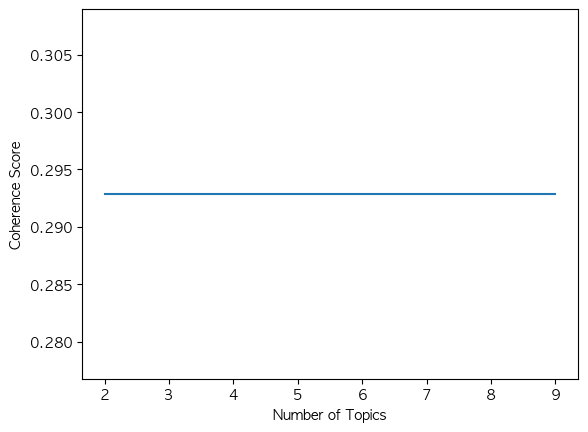

In [238]:
from gensim.models.coherencemodel import CoherenceModel

def find_optimal_topics(dictionary, corpus, texts, start=2, end=10):
    coherence_values = []
    model_list = []
    
    for num_topics in range(start, end):
        # LDA 모델 생성
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=5, random_state=42)
        model_list.append(model)
        
        # Coherence 점수 계산
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    
    return model_list, coherence_values

# 실행
model_list, coherence_values = find_optimal_topics(dictionary, corpus, word['filtered_extracted_article'], start=2, end=10)

# Coherence Score 시각화
import matplotlib.pyplot as plt
x = range(2, 10)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.show()

IndexError: index 29 is out of bounds for axis 1 with size 29

In [245]:
word.loc[word['title'].str.contains('개')]

,title,article,current_time,like,comment,district,dong,category,update_time,cleaned_title,cleaned_article,extracted_title,extracted_article,filtered_extracted_title,filtered_extracted_article
25,종로 이사짐 박스 10개 대여 가능한곳 있을까요?,종로 이사짐 박스 10개 대여 가능한곳 있을까요?,2024-11-27 16:41:30,0,2,종로구,청운효자동,생활/편의,2024-11-25 16:41:30,종로 이사짐 박스 10개 대여 가능한곳 있을까요,종로 이사짐 박스 10개 대여 가능한곳 있을까요,"종로,이,짐,박스,개,대여,가능한,곳,있을까요","종로,이,짐,박스,개,대여,가능한,곳,있을까요","[종로, 짐, 박스, 개, 대여, 가능한]","[종로, 짐, 박스, 개, 대여, 가능한]"
190,용달기사님 소개 부탁드려요,용산구 용달기사님 소개 부탁드립니다,2024-11-27 16:41:51,1,4,중구,삼각동,이사/시공,2024-11-22 16:41:51,용달기사님 소개 부탁드려요,용산구 용달기사님 소개 부탁드립니다,"용달,기사,소개,부탁드려요","용산구,용달,기사,소개,부탁드립니다","[용달, 기사, 소개]","[용산구, 용달, 기사, 소개]"
211,LED 등기구 교체 (1개),현재 있는 형광등이 계속 새것으로 갈아끼워도 깜박여서 LED 등기구로 교체하려고 합...,2024-11-27 16:42:12,0,0,용산구,이태원동,이사/시공,2024-11-27 13:42:12,LED 등기구 교체 1개,현재 있는 형광등이 계속 새것으로 갈아끼워도 깜박여서 LED 등기구로 교체하려고 합...,"등기,구,교체,개","현재,있는,형광등,계속,새것으로,갈아,끼워도,깜박,등기,구로,교체,하려고,합니다,교...","[등기, 교체, 개]","[현재, 형광등, 계속, 새것으로, 갈아, 끼워도, 깜박, 등기, 구로, 교체, 교..."
213,벽에 콘센트 2개 교체해주실분요,중림동 약현성당 근처입니다 작은방 벽면에 콘센트 2개 교체해주실분 계실까요 시간은 ...,2024-11-27 16:42:12,0,2,용산구,동자동,생활/편의,2024-11-27 12:42:12,벽에 콘센트 2개 교체해주실분요,중림동 약현성당 근처입니다 작은방 벽면에 콘센트 2개 교체해주실분 계실까요 시간은 ...,"벽,콘센트,개,교체,해주실,분","중림동,약현성당,근처,입니다,작은방,벽면,콘센트,개,교체,해주실,분,계실까,요,시간...","[벽, 콘센트, 개, 교체, 해주실]","[중림동, 약현성당, 작은방, 벽면, 콘센트, 개, 교체, 해주실, 목요일, 사이,..."
221,만리동고개나 숙대에 호떡 파는 곳 있나요?,갑자기 호떡이 너무 먹고싶네용,2024-11-27 16:42:12,0,4,용산구,청파동1가,맛집,2024-11-27 01:42:12,만리동고개나 숙대에 호떡 파는 곳 있나요,갑자기 호떡이 너무 먹고싶네용,"만리,고개,숙대,호떡,파는,곳,있나요","갑자기,호떡,너무,먹고,싶네용","[만리, 고개, 숙대, 호떡, 파는]","[갑자기, 호떡, 먹고, 싶네용]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,공인중개사 인강,25년도 인강 끊으신분이나 앞으로 계획있으신분중에 일정금액 나눠서 같이 공유하실분 ...,2024-11-28 01:01:26,0,0,강남구,역삼1동,생활/편의,2024-11-27 20:01:26,공인중개사 인강,25년도 인강 끊으신분이나 앞으로 계획있으신분중에 일정금액 나눠서 같이 공유하실분 ...,"공인,중개사,인강","인강,끊으,신분,앞,계획,있으,신분,일정,금액,나눠서,같이,공유,하실,분,계신가요","[공인, 중개사, 인강]","[인강, 끊으, 계획, 있으, 일정, 금액, 나눠서, 공유]"
3457,이건 아재개그 아닙니다,저는 어찌보면 맹한 사람 같기도 합니다 아니 어쩜 그럴수 있담 하면서 혀를 끌끌 찰...,2024-11-28 09:13:05,0,0,강서구,방화제1동,동네풍경,2024-11-28 03:13:05,이건 아재개그 아닙니다,저는 어찌보면 맹한 사람 같기도 합니다 아니 어쩜 그럴수 있담 하면서 혀를 끌끌 찰...,"이건,재개,그,아닙니다","저,어찌,보면,맹,사람,같기도,합니다,아니,어쩜,그럴수,있담,하면서,혀,끌끌,찰지도...","[이건, 재개, 아닙니다]","[보면, 맹, 같기도, 어쩜, 그럴수, 있담, 혀, 끌끌, 찰지도, 모르지만, 아닌..."
3478,여기요 여기요~!!! 대바늘 뜨개질 고수님들😍~ 도와 주세요~~!! 🥹,지금 대바늘 뜨개질 연습하는 중인데요. 앞 뒷면 찍어서 올린거 봐주시고 조언 부탁드...,2024-11-28 09:14:10,1,5,영등포구,영등포본동,취미,2024-11-28 03:14:10,여기요 여기요 대바늘 뜨개질 고수님들 도와 주세요,지금 대바늘 뜨개질 연습하는 중인데요 앞 뒷면 찍어서 올린거 봐주시고 조언 부탁드려...,"여기,여기,대바늘,뜨개질,고수,들,도,주세요","지금,대바늘,뜨개질,연습,하는,중,요,앞,면,찍어서,올린거,봐주시고,조언,부탁드려요...","[대바늘, 뜨개질, 고수, 도]","[대바늘, 뜨개질, 연습, 면, 찍어서, 올린거, 봐주시고, 조언, 실, 바늘, 사..."
3509,뜨개질 코바늘 배우고 싶어요!ㅠㅠ,추워지니 뜨개질이나 코바늘이 배우고 싶은데 어디서 배워야할지 ㅠㅠ 알려주세요 고수님...,2024-11-28 09:14:53,0,1,관악구,신림동,취미,2024-11-28 01:14:53,뜨개질 코바늘 배우고 싶어요ㅠㅠ,추워지니 뜨개질이나 코바늘이 배우고 싶은데 어디서 배워야할지 ㅠㅠ 알려주세요 고수님...,"뜨개질,코바늘,배우고,싶어요","추워지니,뜨개질,코바늘,배우고,싶은데,어디서,배워,야할지,알려주세요,고수,계시다면,...","[뜨개질, 코바늘, 배우고, 싶어요]","[추워지니, 뜨개질, 코바늘, 배우고, 어디서, 배워, 야할지, 알려주세요, 고수,..."


<!-- 분석 주제	적합 기법	활용 사례
지역별 주요 관심사	단어 빈도, TF-IDF, 주제 모델링	지역마다 인기 있는 키워드/주제 식별
감정 분석	감정 사전 기반 분석, 딥러닝 기반 분석	긍정/부정 비율로 지역 분위기 파악
광고 타겟팅	N-gram, Word2Vec, 클러스터링, 프로파일링	맞춤형 광고 문구 생성 및 관심사 그룹 타겟팅
트렌드 분석	시간 기반 빈도 분석, N-gram, 시계열 분석	계절/이벤트 기반 키워드 추적 및 예측 -->